# Práctica 2 - Segmentación

### Patricia Córdoba Hidalgo

Importamos las librerías que usaremos

In [107]:
import pandas as pd
import numpy as np
from pract2_utils import * 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from collections import Counter

In [108]:
datos = pd.read_csv("accidentes_2013.csv", na_values=["?"]) # Leemos los datos del csv

In [109]:
def grafica(data, label, title, xlab, ylab):
    plt.plot(data,label, c='b')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    plt.show()

def graf_barras(data, label, title, xlab, ylab):
    fig, ax = plt.subplots()
    ax.bar(data, label, color='lime')
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

## Escenario 1: Choque frontal en carretera convencional 

### Selección de datos

Estudiaremos los datos que representen choques frontales en carreteras convencionales. 

In [110]:
# Seleccionamos los datos con los que trabajaremos
caso1 = datos[datos.TIPO_VIA == 'VÍA CONVENCIONAL']
caso1 = caso1[caso1.TIPO_ACCIDENTE == 'Colisión de vehículos en marcha (Frontal)']
caso1.head()

,MES,HORA,DIASEMANA,PROVINCIA,COMUNIDAD_AUTONOMA,ISLA,TOT_VICTIMAS,TOT_VICTIMAS30D,TOT_MUERTOS,TOT_MUERTOS30D,...,PRIORIDAD,SUPERFICIE_CALZADA,LUMINOSIDAD,FACTORES_ATMOSFERICOS,VISIBILIDAD_RESTRINGIDA,OTRA_CIRCUNSTANCIA,ACERAS,TIPO_ACCIDENTE,DENSIDAD_CIRCULACION,MEDIDAS_ESPECIALES
75,4,19.0,4,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,MOJADA,CREPÚSCULO,LLUVIA FUERTE,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
132,12,21.0,7,Girona,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,SEÑAL DE STOP,MOJADA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
139,5,15.0,5,Girona,Cataluña,NO_ES_ISLA,1,1,0,0.0,...,NaN,MOJADA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN
146,12,3.0,7,Lleida,Cataluña,NO_ES_ISLA,3,3,0,0.0,...,NaN,SECA Y LIMPIA,NOCHE: SIN ILUMINACIÓN,BUEN TIEMPO,DESLUMBRAMIENTO,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),FLUIDA,NINGUNA MEDIDA
150,3,15.0,6,Barcelona,Cataluña,NO_ES_ISLA,2,2,0,0.0,...,NaN,SECA Y LIMPIA,PLENO DÍA,BUEN TIEMPO,NaN,NINGUNA,NO HAY ACERA,Colisión de vehículos en marcha (Frontal),NaN,NaN


In [111]:
# Los atributos a considerar son:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

In [112]:
# Creamos la matriz con los atributos considerados. No hay valores nulos.
caso1 = caso1[atributos]
caso1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 75 to 88793
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   TOT_VICTIMAS              1448 non-null   int64
 1   TOT_MUERTOS               1448 non-null   int64
 2   TOT_HERIDOS_GRAVES        1448 non-null   int64
 3   TOT_HERIDOS_LEVES         1448 non-null   int64
 4   TOT_VEHICULOS_IMPLICADOS  1448 non-null   int64
dtypes: int64(5)
memory usage: 67.9 KB


### Normalización de los datos

In [113]:
# Le aplicamos normalización a los datos
scaler = MinMaxScaler()
caso1_norm = scaler.fit_transform(caso1)
caso1_norm[:5]

array([[0.06666667, 0.        , 0.        , 0.14285714, 0.2       ],
       [0.13333333, 0.        , 0.        , 0.21428571, 0.2       ],
       [0.        , 0.        , 0.        , 0.07142857, 0.2       ],
       [0.13333333, 0.        , 0.4       , 0.07142857, 0.2       ],
       [0.06666667, 0.        , 0.        , 0.14285714, 0.2       ]])

### Algoritmos de clustering

#### K-Means

Seleccionamos el número de clusters a usar.

In [114]:
# Vectores con los valores de las métricas
s = []
c = []

for i in range(2,15):
    results = KMeans(n_clusters=i, random_state=0).fit(caso1_norm)
    silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results.labels_)
    s.append(silhouette)
    c.append(calinski)

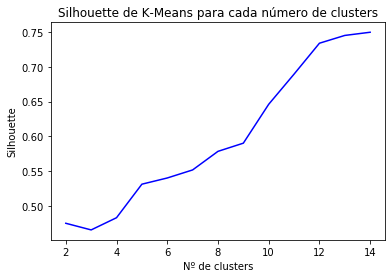

In [115]:
grafica(range(2,15), s, 'Silhouette de K-Means para cada número de clusters', 'Nº de clusters', 'Silhouette')

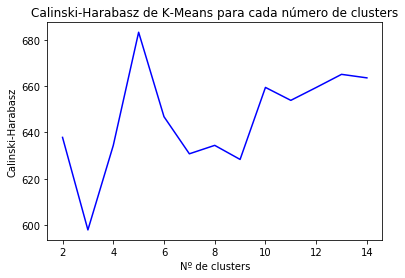

In [116]:
grafica(range(2,15), c, 'Calinski-Harabasz de K-Means para cada número de clusters', 'Nº de clusters', 'Calinski-Harabasz')

In [127]:
print("Silhouette: \n" + str(s))
print()
print("Calinski-Harabasz: \n" + str(c))

Silhouette: 
[0.47551510521831664, 0.46599969633063965, 0.4834890867333391, 0.531569055229591, 0.5404576589330073, 0.5519986909803549, 0.5786471085948178, 0.5903779353773021, 0.6461326222918197, 0.6893747693555886, 0.7336714808160643, 0.7448415168530551, 0.7494104698480949]

Calinski-Harabasz: 
[637.8831140088855, 597.9798532808658, 634.4016355078425, 683.2263367508311, 646.8004817570682, 630.8036708742871, 634.4445453990445, 628.3756258948337, 659.4342926638305, 653.852874658656, 659.3965542394021, 665.0690582901761, 663.5502144820157]


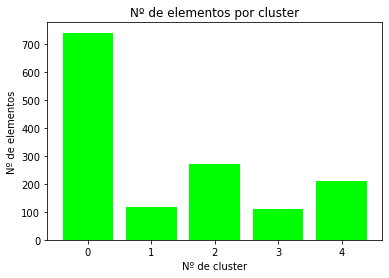

In [122]:
results5 = KMeans(n_clusters=5, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(5)]

for i in range(len(caso1)):
    m[results5.labels_[i]]+=1
    
graf_barras(range(5), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

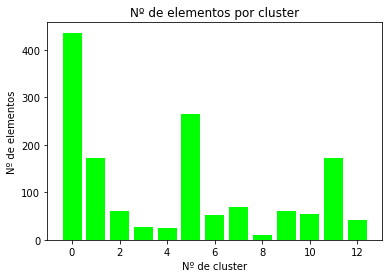

In [123]:
results13 = KMeans(n_clusters=13, random_state=0).fit(caso1_norm)

# Número de elementos por cluster
m = [0 for i in range(13)]

for i in range(len(caso1)):
    m[results13.labels_[i]]+=1
    
graf_barras(range(13), m, "Nº de elementos por cluster","Nº de cluster","Nº de elementos")

Elegimos usar 5 clusters.

In [124]:
# Métricas del modelo
silhouette, calinski = measures_silhoutte_calinski(caso1_norm, results5.labels_)

print("silhouette: {:3f}".format(silhouette))
print("calinsky: {:3f}".format(calinski))

silhouette: 0.531569
calinsky: 683.226337


Visualizamos los centroides.

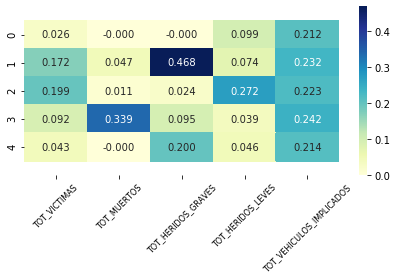

In [129]:
centroids = results5.cluster_centers_
visualize_centroids(centroids, caso1_norm, atributos)

Visualizamos otras gráficas

In [131]:
atributos = ['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']
print(Counter(caso1['TOT_VICTIMAS']))
print(Counter(caso1['TOT_MUERTOS']))
print(Counter(caso1['TOT_HERIDOS_GRAVES']))
print(Counter(caso1['TOT_HERIDOS_LEVES']))
print(Counter(caso1['TOT_VEHICULOS_IMPLICADOS']))

Counter({1: 587, 2: 432, 3: 236, 4: 91, 5: 52, 6: 28, 7: 14, 9: 3, 8: 2, 10: 2, 16: 1})
Counter({0: 1306, 1: 111, 2: 23, 3: 7, 4: 1})
Counter({0: 1045, 1: 278, 2: 97, 3: 19, 4: 5, 5: 4})
Counter({1: 581, 2: 355, 0: 227, 3: 163, 4: 64, 5: 33, 6: 11, 7: 9, 8: 3, 9: 1, 14: 1})
Counter({2: 1331, 3: 98, 4: 12, 5: 3, 1: 3, 6: 1})


/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/patricia/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


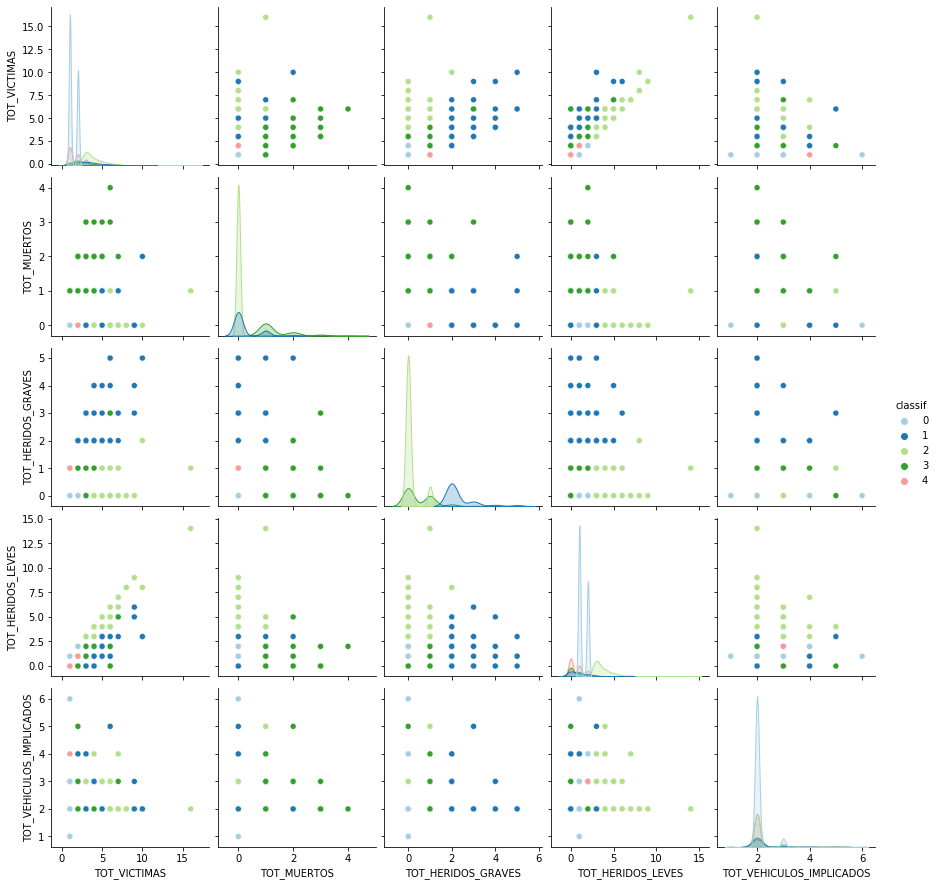

In [130]:
pairplot(caso1, atributos, results5.labels_)